# 
<h1 style="text-align: center;">ELE489 FUNDAMENTALS OF MACHINE LEARNING</h1>
<h2 style="text-align: center;">HW2</h2>
<h3 style="text-align: center;">ALI OZYUKSEL</h3>
<h3 style="text-align: center;">2220357137</h3>
<h3 style="text-align: center;"> </h3>
<h3 style="text-align: center;">07.04.2025</h3>

## Question 2

### 2

- Initializing and Visualizing the features

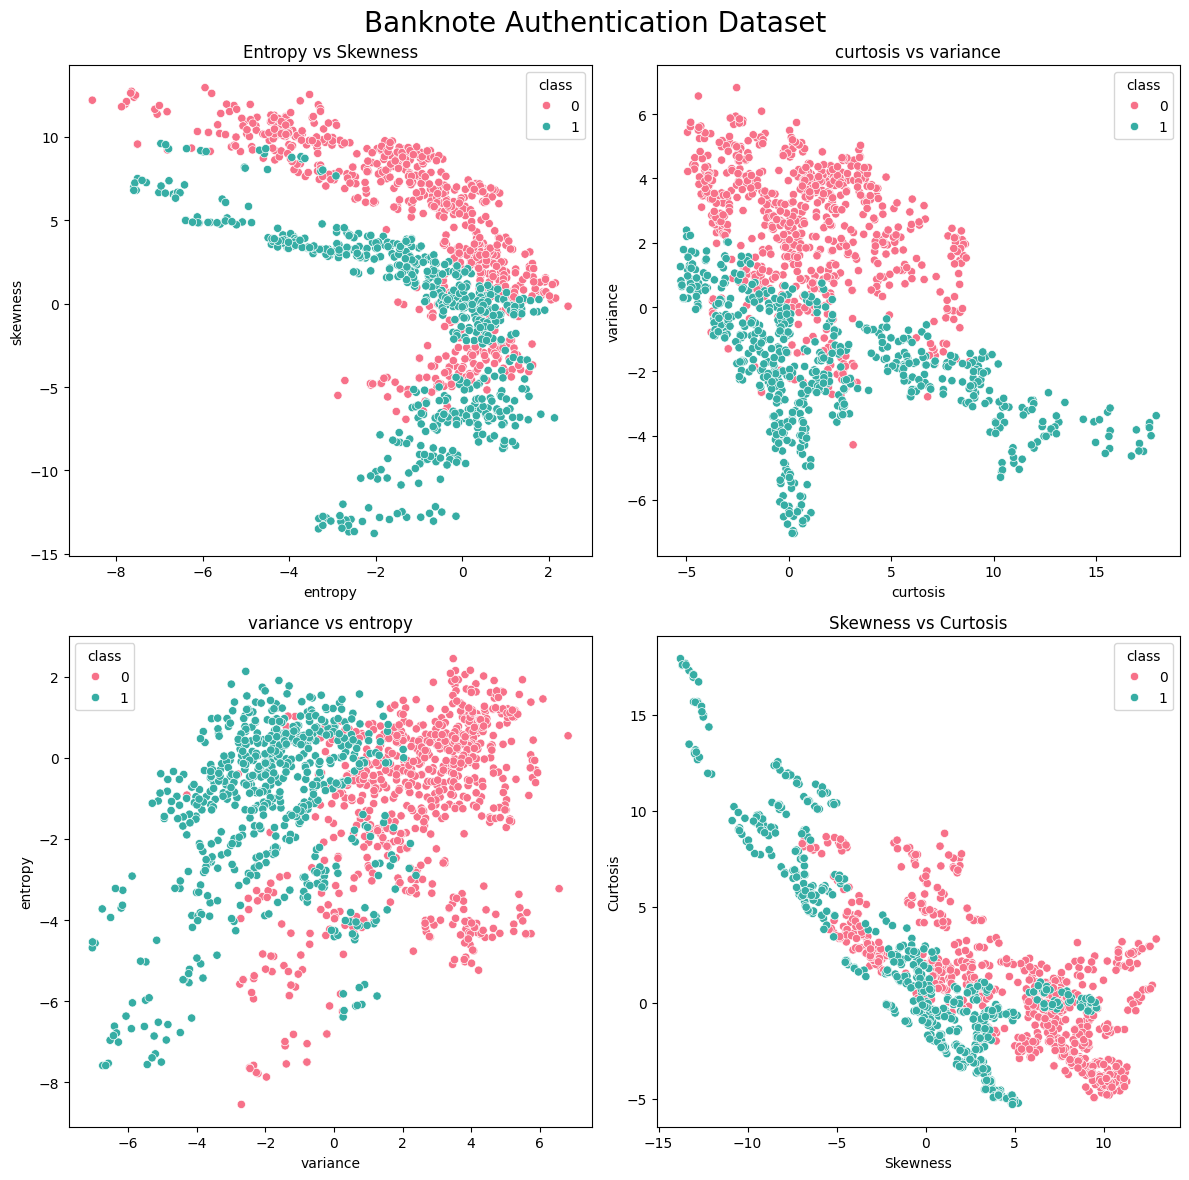

In [26]:
# -*- coding: utf-8 -*-
# #initialization of all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree   import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix


data_file = "data_banknote_authentication.txt"
df= pd.read_csv(data_file, header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

figs, axs = plt.subplots(2, 2, figsize=(12, 12))
figs.suptitle('Banknote Authentication Dataset', fontsize=20)
sns.scatterplot(data=df, x='entropy', y='skewness', hue='class', palette='husl' ,ax=axs[0,0])
plt.xlabel('entropy')
plt.ylabel('Skewness')
axs[0,0].set_title('Entropy vs Skewness')

sns.scatterplot(data=df, x='curtosis', y='variance', hue='class', palette='husl',ax=axs[0,1])
axs[0,1].set_title('curtosis vs variance')
plt.xlabel('Curtosis')
plt.ylabel('variance')
sns.scatterplot(data=df, x='variance', y='entropy', hue='class', palette='husl',ax=axs[1,0])
ax=axs[1,0].set_title('variance vs entropy')
plt.xlabel('variance')
plt.ylabel('Entropy')
sns.scatterplot(data=df, x='skewness', y='curtosis', hue='class', palette='husl',ax=axs[1,1])
axs[1,1].set_title('Skewness vs Curtosis')
plt.xlabel('Skewness')
plt.ylabel('Curtosis')

plt.tight_layout()
plt.show()



### 3

- Changing the parameters criterion, min_samples_split and max_depth
- Classificaiton report of each tree created
- 6 Confusion matrix plot to compare each of them
- It is important to note that in classification_report function, if it is returning as dictionary, you can not change the digits.
  - So some of the numbers are rounded and seems equal.
  - But when to check variables or even looking at heatmap, one can see the difference.

#### Comparision for Gini and Entropy

0.9818181818181818
0.9854545454545455


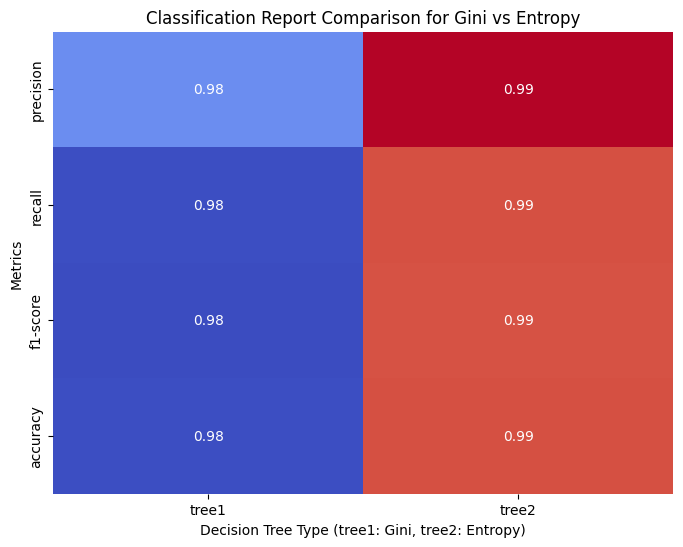

In [27]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

#creating a Decision Tree Classifier and fitting it to the training data
tree1= DecisionTreeClassifier(criterion='gini',random_state=42)
tree1.fit(X_train, y_train)
print(tree1.score(X_test, y_test))

tree2= DecisionTreeClassifier(criterion='entropy',random_state=42) 
tree2.fit(X_train, y_train)
print(tree2.score(X_test, y_test))

#classification report for both trees
classification_report1 = classification_report(y_test, tree1.predict(X_test), output_dict=True)
classification_report2 = classification_report(y_test, tree2.predict(X_test), output_dict=True)
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
comparison1 = {
    'tree1': [classification_report1['weighted avg']['precision'], 
              classification_report1['weighted avg']['recall'], 
              classification_report1['weighted avg']['f1-score'], 
              classification_report1['accuracy']],
    'tree2': [classification_report2['weighted avg']['precision'], 
              classification_report2['weighted avg']['recall'], 
              classification_report2['weighted avg']['f1-score'], 
              classification_report2['accuracy']]
}

comparison_df = pd.DataFrame(comparison1, index=metrics)

plt.figure(figsize=(8, 6))
sns.heatmap(comparison_df, annot=True, cmap="coolwarm", cbar=False)
plt.title('Classification Report Comparison for Gini vs Entropy')
plt.xlabel('Decision Tree Type (tree1: Gini, tree2: Entropy)')
plt.ylabel('Metrics')

plt.show()

#### Comparision for max_depth

- They both given 'gini' for comparision of effect of max_depth

0.88
0.9672727272727273


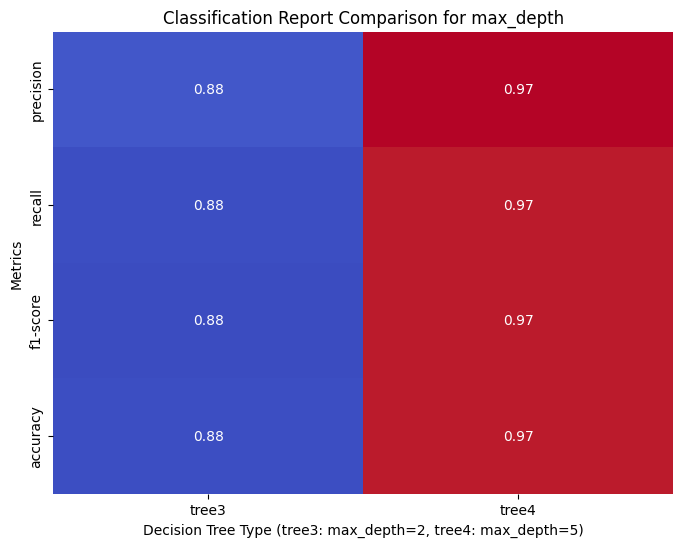

In [28]:
#comparision of max_depth
tree3 = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=2)
tree3.fit(X_train, y_train)
print(tree3.score(X_test, y_test))

tree4 = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=5)
tree4.fit(X_train, y_train)
print(tree4.score(X_test, y_test))

#classification report for both trees
classification_report3 = classification_report(y_test, tree3.predict(X_test), output_dict=True)
classification_report4 = classification_report(y_test, tree4.predict(X_test), output_dict=True)

comparison2 = {
    'tree3': [classification_report3['weighted avg']['precision'], 
              classification_report3['weighted avg']['recall'], 
              classification_report3['weighted avg']['f1-score'], 
              classification_report3['accuracy']],
    'tree4': [classification_report4['weighted avg']['precision'], 
              classification_report4['weighted avg']['recall'], 
              classification_report4['weighted avg']['f1-score'], 
              classification_report4['accuracy']]
}

comparison_df2 = pd.DataFrame(comparison2, index=metrics)

plt.figure(figsize=(8, 6))
sns.heatmap(comparison_df2, annot=True, cmap="coolwarm", cbar=False)
plt.title('Classification Report Comparison for max_depth')
plt.xlabel('Decision Tree Type (tree3: max_depth=2, tree4: max_depth=5)')
plt.ylabel('Metrics')

plt.show()

#### Comparision for min_samples_split 

- They both given 'gini' for comparision of effect of max_depth

0.9672727272727273
0.88


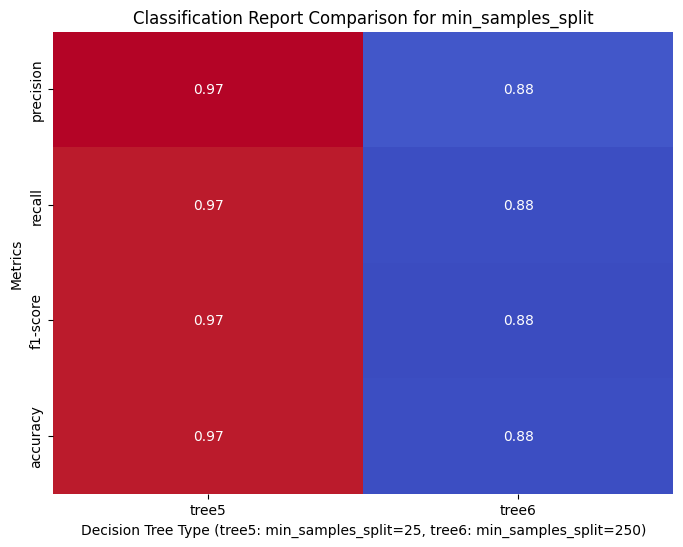

In [29]:
#comparision of min_samples_split
tree5 = DecisionTreeClassifier(criterion='gini',random_state=42, min_samples_split=25)
tree5.fit(X_train, y_train)
print(tree5.score(X_test, y_test))

tree6 = DecisionTreeClassifier(criterion='gini',random_state=42, min_samples_split=250)
tree6.fit(X_train, y_train)
print(tree6.score(X_test, y_test))

#classification report for both trees
classification_report5 = classification_report(y_test, tree5.predict(X_test), output_dict=True,digits=5)
classification_report6 = classification_report(y_test, tree6.predict(X_test), output_dict=True,digits=5)

comparison3 = {
    'tree5': [classification_report5['weighted avg']['precision'], 
              classification_report5['weighted avg']['recall'], 
              classification_report5['weighted avg']['f1-score'], 
              classification_report5['accuracy']],
    'tree6': [classification_report6['weighted avg']['precision'], 
              classification_report6['weighted avg']['recall'], 
              classification_report6['weighted avg']['f1-score'], 
              classification_report6['accuracy']]
}

comparison_df3 = pd.DataFrame(comparison3, index=metrics)
comparison_df3=comparison_df3.round(10)
plt.figure(figsize=(8, 6))
sns.heatmap(comparison_df3, annot=True, cmap="coolwarm", cbar=False)
plt.title('Classification Report Comparison for min_samples_split')
plt.xlabel('Decision Tree Type (tree5: min_samples_split=25, tree6: min_samples_split=250)')
plt.ylabel('Metrics')

plt.show()

#### Confusion Matrix for All the trees to comparision

- For better comparision, here are the all trees created.

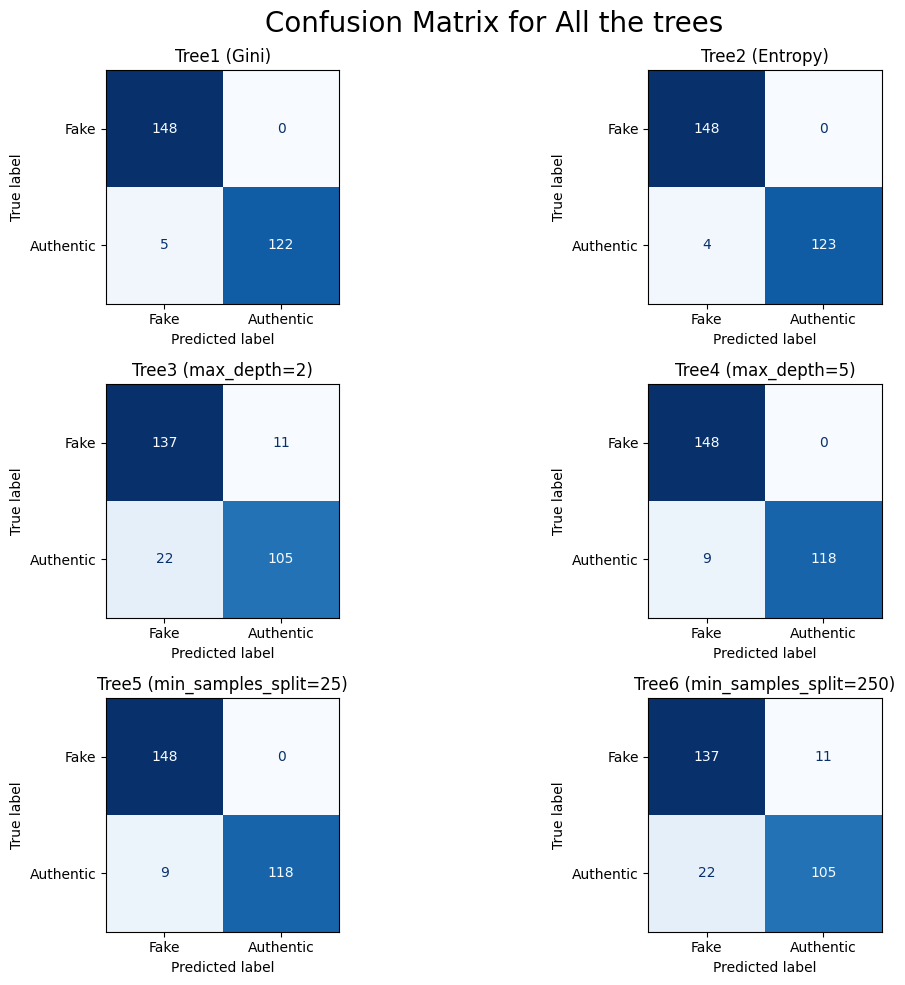

In [30]:
figs, axs = plt.subplots(3, 2, figsize=(12, 10))
figs.suptitle('Confusion Matrix for All the trees', fontsize=20)

ConfusionMatrixDisplay(confusion_matrix(y_test, tree1.predict(X_test)), display_labels=['Fake', 'Authentic']).plot(cmap='Blues',colorbar=False,ax=axs[0,0])
axs[0,0].set_title('Tree1 (Gini)')
ConfusionMatrixDisplay(confusion_matrix(y_test, tree2.predict(X_test)), display_labels=['Fake', 'Authentic']).plot(cmap='Blues',colorbar=False,ax=axs[0,1])
axs[0,1].set_title('Tree2 (Entropy)')
ConfusionMatrixDisplay(confusion_matrix(y_test, tree3.predict(X_test)), display_labels=['Fake', 'Authentic']).plot(cmap='Blues',colorbar=False,ax=axs[1,0])
axs[1,0].set_title('Tree3 (max_depth=2)')
ConfusionMatrixDisplay(confusion_matrix(y_test, tree4.predict(X_test)), display_labels=['Fake', 'Authentic']).plot(cmap='Blues',colorbar=False,ax=axs[1,1])
axs[1,1].set_title('Tree4 (max_depth=5)')
ConfusionMatrixDisplay(confusion_matrix(y_test, tree5.predict(X_test)), display_labels=['Fake', 'Authentic']).plot(cmap='Blues',colorbar=False, ax=axs[2,0])
axs[2,0].set_title('Tree5 (min_samples_split=25)')
ConfusionMatrixDisplay(confusion_matrix(y_test, tree6.predict(X_test)), display_labels=['Fake', 'Authentic']).plot(cmap='Blues',colorbar=False, ax=axs[2,1])
axs[2,1].set_title('Tree6 (min_samples_split=250)')

plt.tight_layout()

plt.show()

### 4

- To visualize the tree depth, tree3 and tree4 are comparized.
    * They are dramatically different from each other.

#### Plotting the tree3

Text(0.5, 1.0, 'Decision Tree with max_depth=2 and accuracy=0.88')

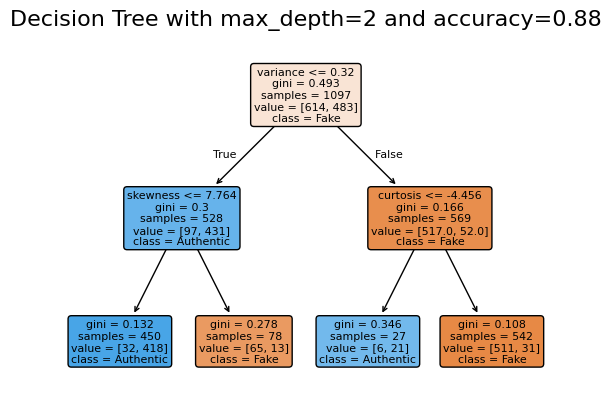

In [31]:
plot_tree(tree3, filled=True, feature_names=X_train.columns, class_names=['Fake', 'Authentic'], rounded=True,max_depth=2)
plt.title(f"Decision Tree with max_depth=2 and accuracy={tree3.score(X_test, y_test)}", fontsize=16)

#### Plotting the tree4

Text(0.5, 1.0, 'Decision Tree with max_depth=5 and accuracy=0.9672727272727273')

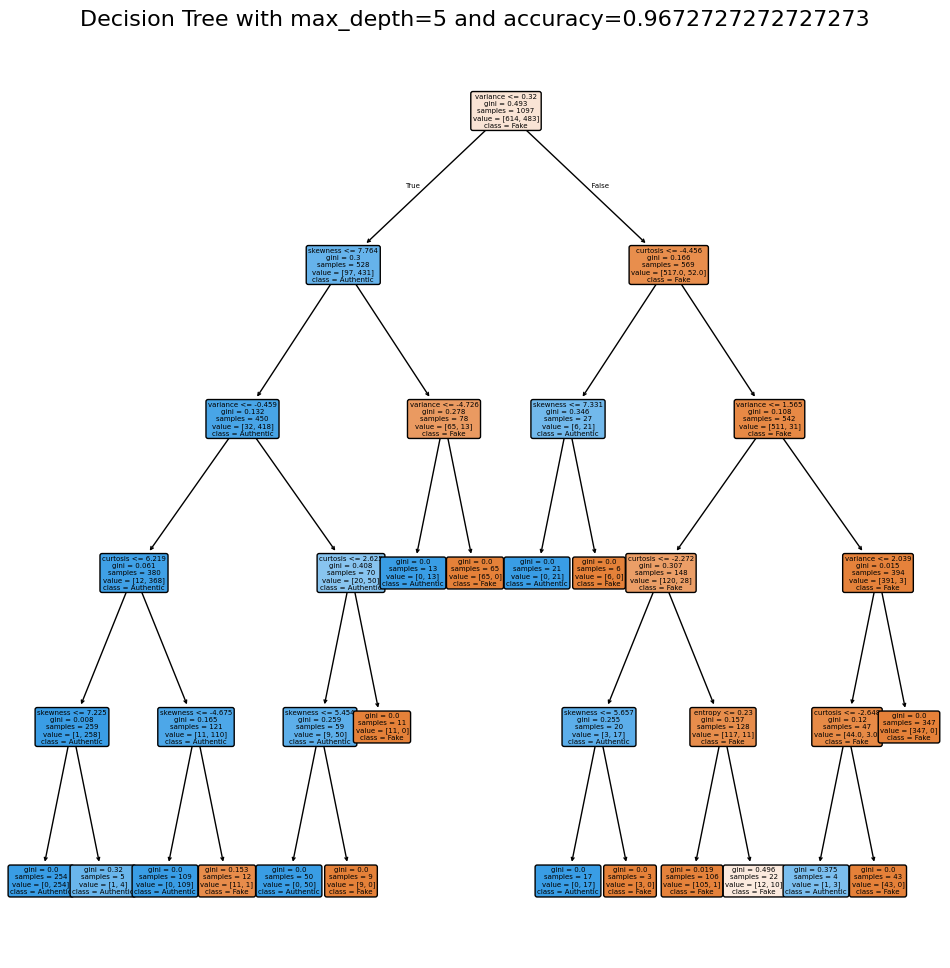

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(tree4, filled=True, feature_names=X_train.columns, class_names=['Fake', 'Authentic'], rounded=True,max_depth=5,fontsize=5)
plt.title(f"Decision Tree with max_depth=5 and accuracy={tree4.score(X_test, y_test)}", fontsize=16)

### 5

- Feature importances of tree3 and tree4
  - The difference between them are more dramatically then others.

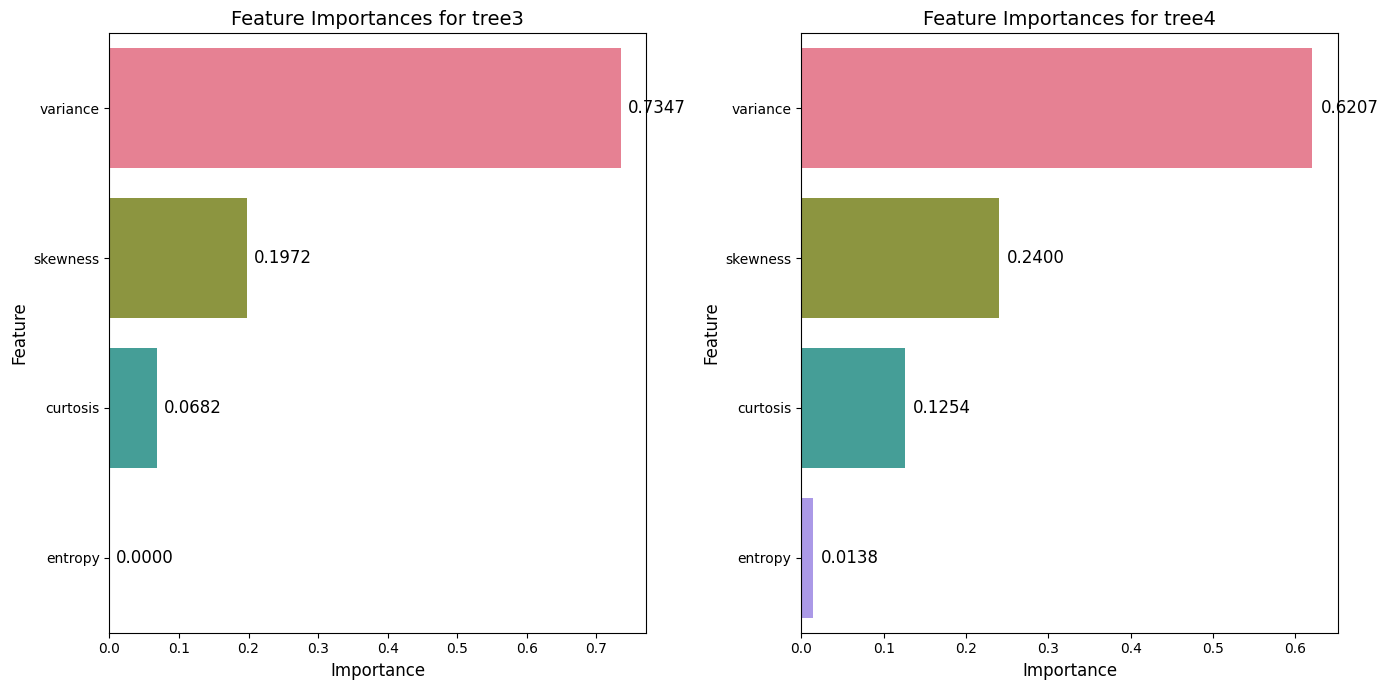

In [33]:
importances3 = tree3.feature_importances_
importances4 = tree4.feature_importances_

features = X_train.columns
importance_df1 = pd.DataFrame({
    'Feature': features,
    'Importance': importances3
})
importance_df2 = pd.DataFrame({
    'Feature': features,
    'Importance': importances4
})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  
sns.barplot(x='Importance', y='Feature', data=importance_df1,palette='husl',hue='Feature')
plt.title('Feature Importances for tree3', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
#just to make plot mor readable, we are adding the values on top of the bars
for index, value in enumerate(importance_df1['Importance']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=12)
plt.subplot(1, 2, 2)  
sns.barplot(x='Importance', y='Feature', data=importance_df2,palette='husl',hue='Feature')
plt.title('Feature Importances for tree4', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

for index, value in enumerate(importance_df2['Importance']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=12)
plt.tight_layout()  
plt.show()
